In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import networkx as nx

from networkx.algorithms import bipartite

In [2]:
df = pd.read_csv("twitter_network.csv", header = None)
col_names = ['User', 'Friend']
df.columns = col_names
df.head()

,User,Friend
0,BeingSalmanKhan,iamsrk
1,BeingSalmanKhan,aamir_khan
2,BeingSalmanKhan,Asli_Jacqueline
3,BeingSalmanKhan,MirzaSania
4,BeingSalmanKhan,realpreityzinta


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   User    470 non-null    object
 1   Friend  470 non-null    object
dtypes: object(2)
memory usage: 7.5+ KB


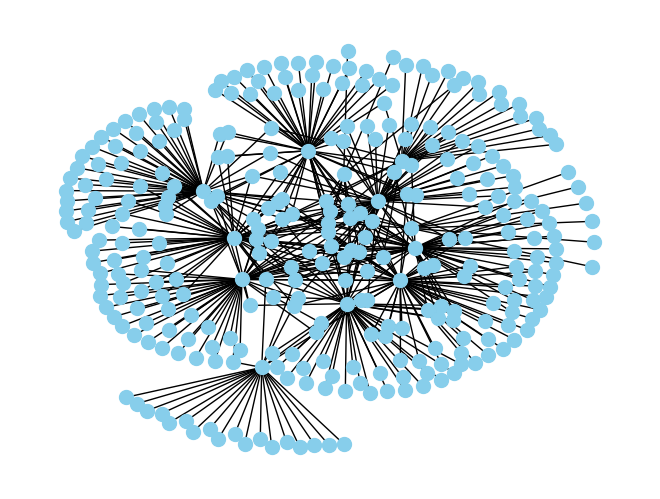

In [4]:
G = nx.Graph()
G = nx.from_pandas_edgelist(df, 'User', 'Friend')

pos = nx.kamada_kawai_layout(G)
nx.draw(G, pos, with_labels = False, node_size = 100, node_color = 'skyblue', font_size = 5)
plt.show()

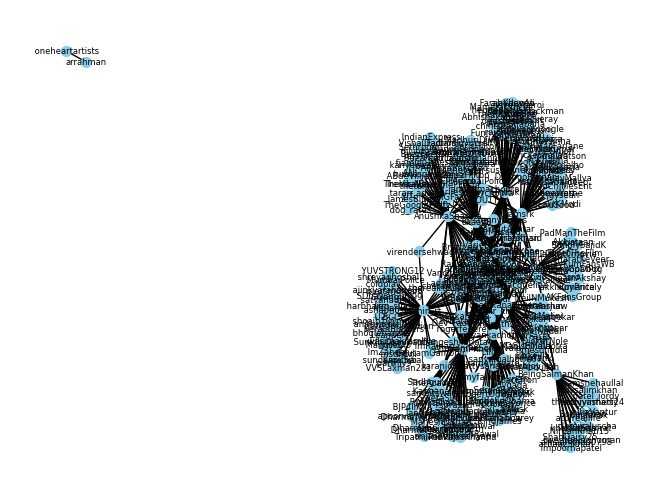

In [5]:
# Spring layout allows you to see the outliers.

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels = True, node_size = 50, node_color = 'skyblue', font_size = 6)
plt.show()

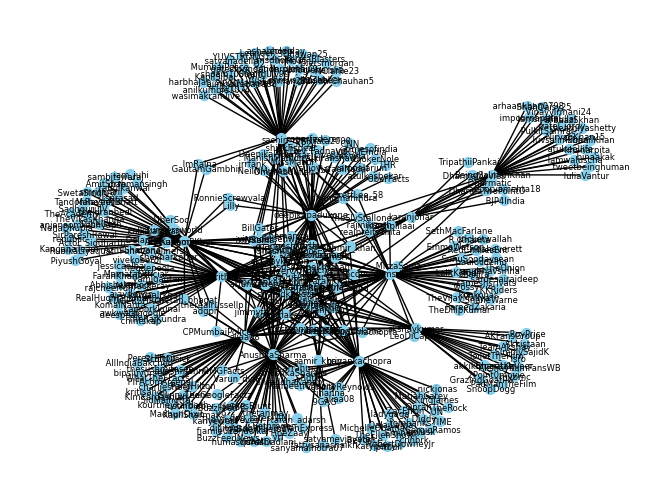

In [6]:
# Remove the two isolated nodes 
G.remove_nodes_from([' oneheartartists', 'arrahman'])

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels = True, node_size = 50, node_color = 'skyblue', font_size = 6)
plt.show()

In [7]:
# Check basic properties of graph 
def check_bipartite(G): 
    if bipartite.is_bipartite(G) == True:
        print("G is bipartite") 
    else:
        print("G is not bipartite")

def check_connectedness(G): 
    if nx.is_connected(G) == True: 
        print("G is connected")
    else: 
        print("G is disconnected")

check_bipartite(G)
check_connectedness(G)
print("Number of connected components:", nx.number_connected_components(G))


G is bipartite
G is connected
Number of connected components: 1


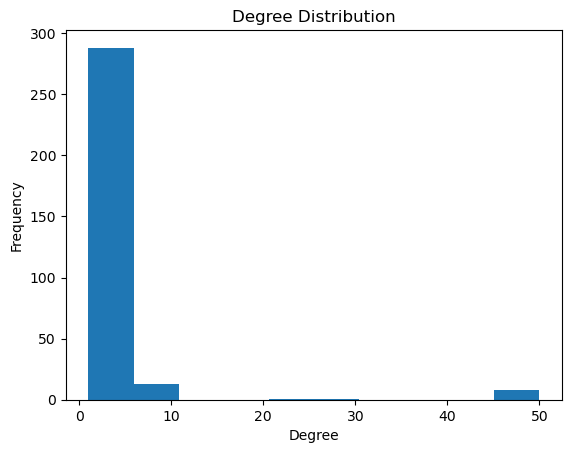

In [8]:
def plot_degree_distribution(G): 
    degree = [G.degree(n) for n in G.nodes()]
    plt.hist(degree, bins = 10)
    plt.title("Degree Distribution")
    plt.xlabel("Degree")
    plt.ylabel("Frequency")
    plt.show()

plot_degree_distribution(G)

In [9]:
# Find percentage of users with degree <= 5 
degrees = dict(G.degree())
nodes_with_deg_5_or_less = [node for node, degree in degrees.items() if degree <= 5 ]
percentage_nodes_with_deg_5_or_less = (len(nodes_with_deg_5_or_less) / len(G.nodes())) * 100.0 
print(f"Percentage of nodes with degree <= 5: {percentage_nodes_with_deg_5_or_less:.2f}%")

# Find users with degree > 40 
users_with_deg_more_than_40 = [node for node, degree in degrees.items() if degree > 40]
print("Users whose nodes have in-degree more than 40:", users_with_deg_more_than_40)

Percentage of nodes with degree <= 5: 92.60%
Users whose nodes have in-degree more than 40: ['iamsrk', 'sachin_rt', 'iHrithik', 'deepikapadukone', 'priyankachopra', 'AnushkaSharma', 'aliaa08', 'AnupamPKher']


In [10]:
# Check global clustering coefficient 
print("The global clustering coefficient, measured using average local clustering coefficient over all nodes in G is:", nx.average_clustering(G))
print("The global clustering coefficient, measured using transitivity is:", nx.transitivity(G))

# Find nodes with the highest local clustering coefficient 
local_clustering_coefficient = nx.clustering(G)
sorted_nodes = sorted(local_clustering_coefficient.items(), key = lambda x: x[1], reverse = True)
top_5 = sorted_nodes[:5]

print("")
print("Top 5 nodes with highest local clustering coefficient:")
for node, local_clustering_coefficient in top_5: 
    print(f"Node: {node}, Local clustering coefficient: {local_clustering_coefficient:.3f}")


The global clustering coefficient, measured using average local clustering coefficient over all nodes in G is: 0.0
The global clustering coefficient, measured using transitivity is: 0

Top 5 nodes with highest local clustering coefficient:
Node: BeingSalmanKhan, Local clustering coefficient: 0.000
Node:  iamsrk, Local clustering coefficient: 0.000
Node:  aamir_khan, Local clustering coefficient: 0.000
Node:  Asli_Jacqueline, Local clustering coefficient: 0.000
Node:  MirzaSania, Local clustering coefficient: 0.000


In [11]:
def distance_measure(G): 
    avg_distance = nx.average_shortest_path_length(G)
    diam = nx.diameter(G)
    radius = nx.radius(G)
    print(f"Average distance: {avg_distance:.2f}")
    print("Diameter: ", diam)
    print("Radius: ", radius)

distance_measure(G)

Average distance: 3.55
Diameter:  6
Radius:  3


In [12]:
def periphery(G): 
    if len(nx.periphery(G)) == 0: 
        print("There are no nodes with eccentricity equal to the diameter.")
    else: 
        print("Number of nodes in the periphery: ", len(nx.periphery(G)))
        print("Periphery: ", nx.periphery(G))
periphery(G)

def center(G): 
    if len(nx.center(G)) == 0: 
        print("There are no nodes with eccentricity equal to the radius.")
    else: 
        print("Number of nodes in the center: ", len(nx.center(G)))
        print("Center: ", nx.center(G))
center(G)

Number of nodes in the periphery:  60
Periphery:  [' theathiyashetty', ' arbaazSkhan', ' khanarpita', ' ShahDaisy25', ' PulkitSamrat', ' iamsnehaullal', ' tweetbeinghuman', ' luvsalimkhan', ' IuliaVantur', ' SohailKhan', ' binaakak', ' impoornapatel', ' Vinayvirmani24', ' atulreellife', ' NirvanKhan15', ' arhaankhan0798', ' Iamwaluscha', ' patel_jordy', ' SnoopDogg', ' rajnathsingh', ' isro', ' mybmc', ' Akkistaan', ' SimplySajidK', ' TeamAkshay', ' 2Point0movie', ' AkshayKumFansWB', ' akkikumaritaly', ' AKFansGroup', ' BharatKeVeer', ' GrazingGoatPix', ' ToiletTheFilm', ' PadManTheFilm', ' RoyPrice', ' satyamevjayate', ' fattysanashaikh', ' sanyamalhotra07', ' AmitShah', ' thekiranbedi', ' smritiirani', ' PiyushGoyal', ' iam_juhi', ' Suhelseth', ' rsprasad', ' rahulkanwal', ' sambitswaraj', ' anjanaomkashyap', ' Actor_Siddharth', ' MaheshNBhatt', ' TheAcademy', ' SadhguruJV', ' SirPareshRawal', ' SwetaSinghAT', ' RubikaLiyaquat', ' NehaDhupia', ' drramansingh', ' TheVikasKhanna', ' Ka

In [14]:
# Output top 5 nodes with highest degree centrality 
def top5_degree_centrality(G): 
    degree_centrality = nx.degree_centrality(G)
    sorted_nodes = sorted(degree_centrality.items(), key = lambda x:x[1], reverse = True)
    top5 = sorted_nodes[:5]
    print("Top 5 nodes with the highest degree centrality:")
    for node, centrality in top5:
       print(f"Node: {node}, Degree Centrality: {centrality:.4f}")

top5_degree_centrality(G)

Top 5 nodes with the highest degree centrality:
Node: iamsrk, Degree Centrality: 0.1613
Node: sachin_rt, Degree Centrality: 0.1613
Node: iHrithik, Degree Centrality: 0.1613
Node: deepikapadukone, Degree Centrality: 0.1613
Node: priyankachopra, Degree Centrality: 0.1613


In [23]:
# Output top 5 nodes with highest closeness centrality 
def top5_closeness_centrality(G): 
    closeness_centrality = nx.closeness_centrality(G)
    sorted_nodes = sorted(closeness_centrality.items(), key = lambda x:x[1], reverse = True)
    top5 = sorted_nodes[:5]
    print("Top 5 nodes with the highest closeness centrality:")
    for node, centrality in top5:
       print(f"Node: {node}, Closeness Centrality: {centrality:.4f}")

top5_closeness_centrality(G)

Top 5 nodes with the highest closeness centrality:
Node:  iamsrk, Closeness Centrality: 0.4144
Node:  SrBachchan, Closeness Centrality: 0.4144
Node:  shahidkapoor, Closeness Centrality: 0.4058
Node:  juniorbachchan, Closeness Centrality: 0.4026
Node:  karanjohar, Closeness Centrality: 0.4005
